#Import of libraries needed


**We install and import the necessary libraries. We import the warnings library to alert us to any anomalies.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from pylab import *   
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
#%matplotlib inline to include the graphs with the code

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data loading and first exploratory analysis

**We upload .csv data via pandas. We use some functions to understand the data available.**

In [4]:
data = pd.read_csv("/content/drive/MyDrive/glassdoor_jobs.csv")

**First 5 observations.**

In [5]:
data.head(5) 

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


**Last 5 observations.**

In [6]:
data.tail(5) 

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom
955,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1


**Dataset dimensionality.**

In [7]:
data.shape 

(956, 15)

**Dataset columns.**

In [8]:
data.columns 

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


**We have all 956 values per column not null.**
**The parameters: Unnamed, Rating, Founded are the only numeric data.**

In [10]:
data.describe() 

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


**An overview of numerical values.**

**We note outliers for the 'min' category.**

#Cleaning data

In [11]:
data.columns = ["N","Titolo lavorativo","Salario stimato","Descrizione lavoro","Punteggio","Compagnia","Luogo",
                "Sede","Dimensioni","Anno fondazione","Tipo di azienda","Industria","Settore","Fatturato","Concorrenti"]
data.index.name = "Numero osservazione"
data.pop("N")

Numero osservazione
0        0
1        1
2        2
3        3
4        4
      ... 
951    951
952    952
953    953
954    954
955    955
Name: N, Length: 956, dtype: int64

**In both the "Score" and "Foundation Year" columns we have the outlier value -1 as we could see while exploring the data. To solve this problem we are going to replace the value -1 with the mean of the distribution for both columns.**


In [12]:
data['Punteggio'] = data['Punteggio'].apply(lambda x: np.NaN if x == -1 else x) #To the score column we apply a function that replaces the value -1 with NaN.
data['Punteggio'] = data['Punteggio'].fillna(data['Punteggio'].mean()) #We fill in the NaN values with the average of the scores.

data['Anno fondazione'] = data['Anno fondazione'].apply(lambda x: np.NaN if x== -1 else x) #We repeat the same procedure applied to 'Score'.
data['Anno fondazione'] = data['Anno fondazione'].fillna(int(data['Anno fondazione'].median()))
data['Anno fondazione'] = data['Anno fondazione'].astype('int') #astype() -> Converts the type of data taken.

**We use the plt function to plot the graphs.**

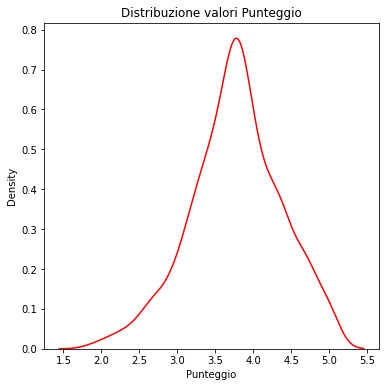

In [13]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=data['Punteggio'], hist=False, color='r') #distplot is one of the functions available on seaborn to plot graphs.
p = plt.title('Distribuzione valori Punteggio')              #It is recommended that you read the documentation to know how to modify them to your liking.

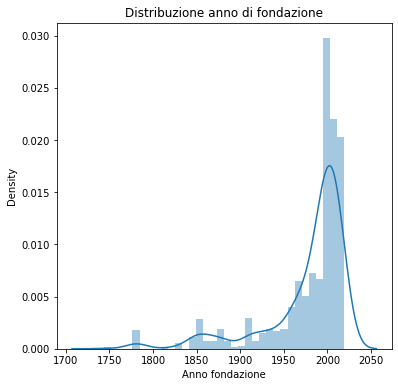

In [14]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=data['Anno fondazione'])
p = plt.title('Distribuzione anno di fondazione')

**The scores are almost concentrated on the value of 3.5-4.0.**
**The average founding year of the various companies appears to have occurred in the new millennium.**

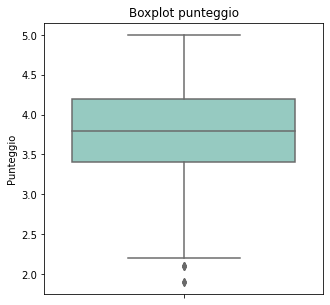

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Punteggio', data=data, orient='v', palette='Set3') #boxplot is another way to plot data. Again, it is recommended to read the documentation.
p = plt.title('Boxplot punteggio')                                
p = plt.ylabel('Punteggio')

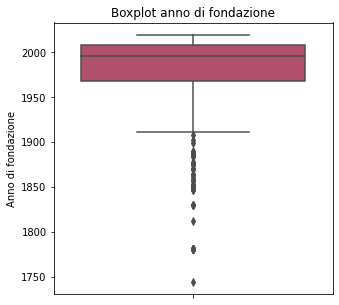

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Anno fondazione', data=data, orient='v', palette='flare')
p = plt.title('Boxplot anno di fondazione')
p = plt.ylabel('Anno di fondazione')

**The boxplots confirm the above. Another observation can be made about the year the companies were founded. We have many companies born around 2000 but at the same time we have many value outsiders.**

**We now turn to column cleaning.**

In [17]:
data['Titolo lavorativo'].value_counts().nlargest(20) #We count how many times a working title(value_counts()) is repeated.
                                                      #We list the top 20 with nlargest(20).

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [18]:
def pulizia_titolo(titolo):
  if 'data scientist' in titolo.lower() or 'scientist' in titolo.lower():
    return 'data scientist'
  elif 'data engineer' in titolo.lower():
    return 'data engineer'
  elif 'data analyst' in titolo.lower():
    return 'data analyst'
  elif 'machine learning' in titolo.lower():
    return 'mle'
  elif 'manager' in titolo.lower():
    return 'manager'
  elif 'director' in titolo.lower():
    return 'director'
  else:
    return 'other'

#We defined a small function that 'cleans up' the job titles.
#The lower() function returns an all lowercase string.

data['Titolo lavorativo'] = data['Titolo lavorativo'].apply(pulizia_titolo)
data['Titolo lavorativo'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: Titolo lavorativo, dtype: int64

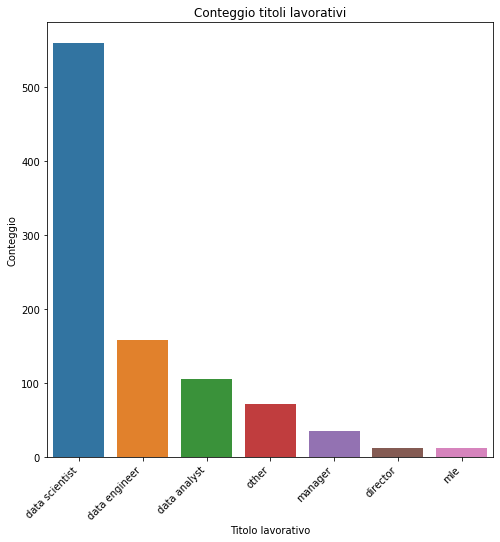

In [19]:
plt.figure(figsize=(8,8))
g = sns.countplot(x= 'Titolo lavorativo', data = data, order = data['Titolo lavorativo'].value_counts().index)
p = plt.title('Conteggio titoli lavorativi')
p = plt.xlabel('Titolo lavorativo')
p = plt.ylabel('Conteggio')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right') #set_xticklabels per ordinare meglio le etichette sotto le varie barre. 

**From our data set the most frequent jobs are data scientist, data engineer and data analyst then the rest of the jobs reflect more of a senior or managerial figure.**
**Prediction therefore fits better for the first 3 occupations.**


**Cleaning column 'Salario stimato'**

In [20]:
salario = data['Salario stimato'].apply(lambda x: x.split("(")[0]) #We use split to delete the string (Glassdor est.).
salario.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salario stimato, Length: 417, dtype: int64

In [21]:
salario = salario.apply(lambda x: np.NaN if x == '-1' else x)
salario

Numero osservazione
0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salario stimato, Length: 956, dtype: object

In [22]:
salario = salario.apply(lambda x: x if type(x) == type(3.5) else x.replace('$','').replace('K','')) #With the replace function we replace
salario                                                                                             #the characters $ and K with spaces.

Numero osservazione
0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salario stimato, Length: 956, dtype: object

**Let's analyze wages again and try to clean the outlier data.**

In [23]:
print("Salari: ",len(salario.unique()))
salario.unique()[380:] #unique find the unique values in the column 'Salari'.


Salari:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [24]:
salario = salario.apply(lambda x: x if type(x) == type(3.5) else x.lower().replace("employer provided salary:", ""))

def ore_per_anno(limite_min,limite_max):
  x = limite_min.strip() #strip() deletes beginning and ending characters.
  y = limite_max.strip()
  x = int(int(limite_min)*40*50/1000) #We convert the salary from hourly to annual assuming 40 working hours per week and 50 annual weeks.
  y = int(int(limite_max)*40*50/1000)
  return '{}-{}'.format(x,y)

In [25]:
salario = salario.apply(lambda x: x if type(x) == type(3.5) else (ore_per_anno(x.lower().replace("per hour", "").split('-')[0], x.lower()
                        .replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))

data["Salario stimato"] = salario.apply(lambda x: x if type(x) == type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

salario

Numero osservazione
0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salario stimato, Length: 956, dtype: object

**We assign NaN values to the mean of the distribution of salaries.**


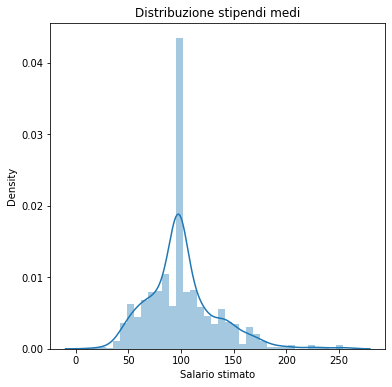

In [26]:
data['Salario stimato'] = data['Salario stimato'].fillna(data['Salario stimato'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a = data['Salario stimato'])
p = plt.title('Distribuzione stipendi medi')

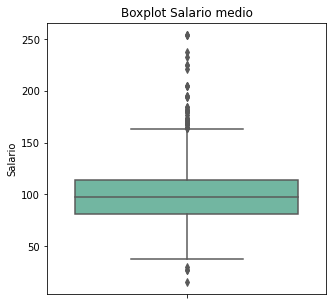

In [27]:
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salario stimato', data=data, orient='v', palette='Set2')
p = plt.title('Boxplot Salario medio')
p = plt.ylabel('Salario')

**The estimated average salary with the data we have is $100,000.
There are also many outsiders values, probably derived from managerial and junior figures.**

**Cleaning column 'Compagnia'**

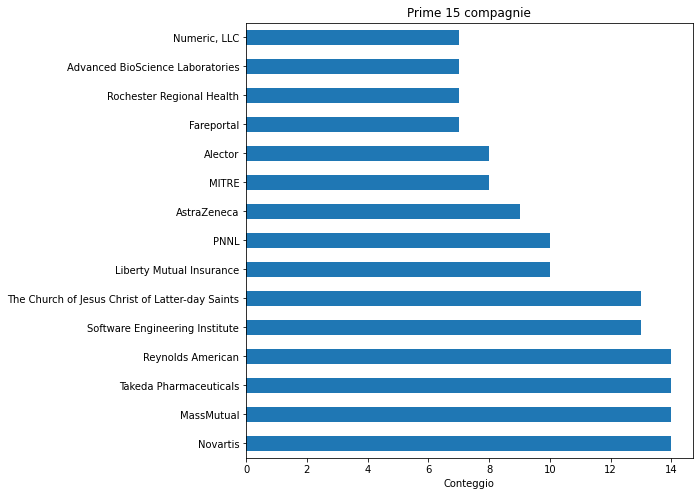

In [28]:
data['Compagnia'] = data['Compagnia'].apply(lambda x: x.split("\n")[0])

plt.figure(figsize = (8,8))
g = data["Compagnia"].value_counts().nlargest(15).plot(kind = 'barh')
p = plt.title('Prime 15 compagnie')
p = plt.xlabel('Conteggio')

**Cleaning column 'Luogo'**

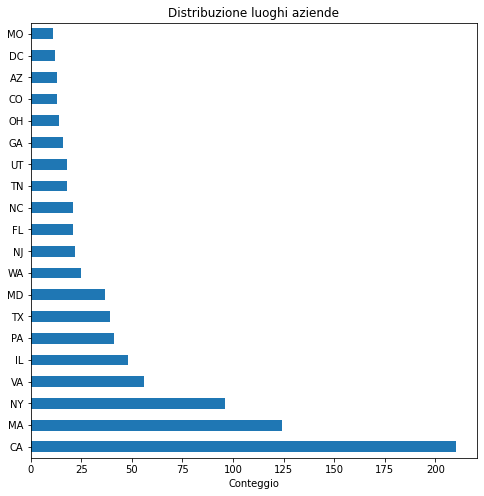

In [29]:
data['Luogo'] = data['Luogo'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
plt.figure(figsize = (8,8))
g = data["Luogo"].value_counts().nlargest(20).plot(kind = 'barh')
p = plt.title('Distribuzione luoghi aziende')
p = plt.xlabel('Conteggio')

**Cleaning column 'Dimensioni'**

In [30]:
data['Dimensioni'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Dimensioni, dtype: int64

In [31]:
def converter(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

data['Dimensioni'] = data['Dimensioni'].apply(converter)

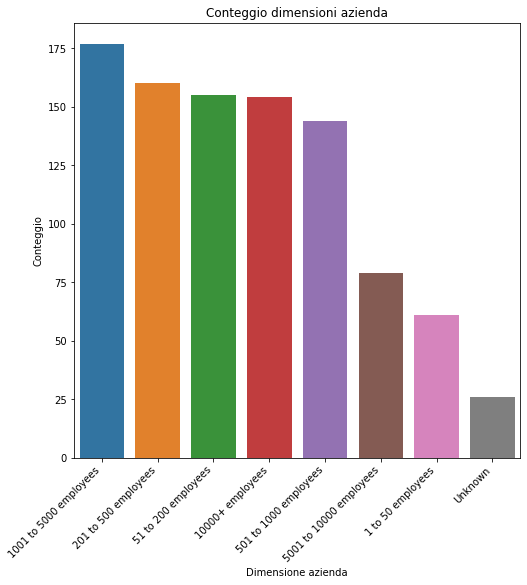

In [32]:
plt.figure(figsize = (8,8))
g = sns.countplot(x='Dimensioni', data = data, order = data['Dimensioni'].value_counts().index)
p = plt.title('Conteggio dimensioni azienda')
p = plt.xlabel('Dimensione azienda')
p = plt.ylabel('Conteggio')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Cleaning column 'Tipo di azienda'**

In [33]:
data['Tipo di azienda'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Tipo di azienda, dtype: int64

**Let's create a function that groups some types of companies together.**

In [34]:
def tipo_di_azienda(azienda):
  if 'private' in azienda.lower():
    return 'Private'
  elif 'public' in azienda.lower():
    return 'Public'
  elif ('-1' in azienda.lower()) or ('unknown' in azienda.lower()) or ('school / school district' in azienda.lower()) or ('private practice / film'
        in azienda.lower()) or ('contract' in azienda.lower()):
          return 'Other Organization'
  else:
    return azienda


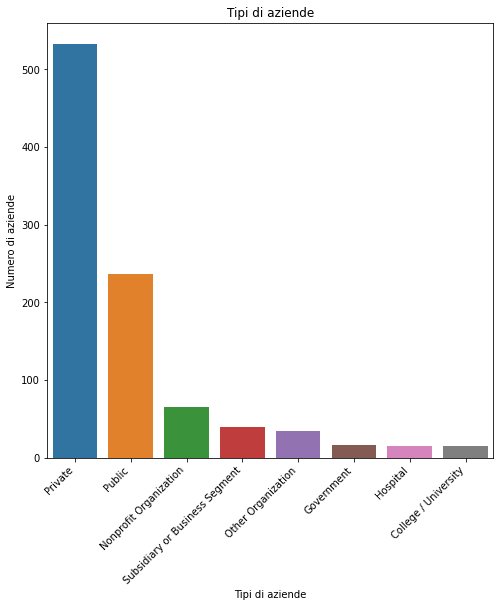

In [35]:
data['Tipo di azienda'] = data['Tipo di azienda'].apply(tipo_di_azienda)

plt.figure(figsize=(8,8))
g = sns.countplot(x='Tipo di azienda', data = data, order = data['Tipo di azienda'].value_counts().index)
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
p = plt.title('Tipi di aziende')
p = plt.xlabel('Tipi di aziende')
p = plt.ylabel('Numero di aziende')

**Cleaning column 'Industria'**

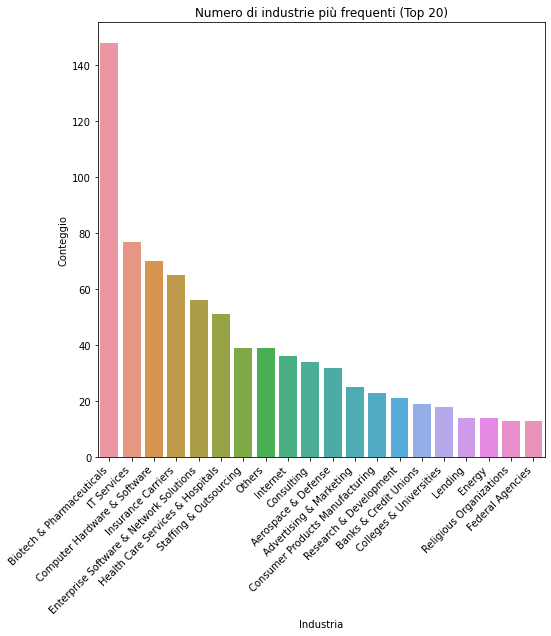

In [36]:
data['Industria'] = data['Industria'].apply(lambda x: 'Others' if x == '-1' else x)

plt.figure(figsize=(8,8))
g = sns.countplot(x='Industria', data = data, order = data['Industria'].value_counts()[:20].index)
p = plt.title('Numero di industrie più frequenti (Top 20)')
p = plt.xlabel('Industria')
p = plt.ylabel('Conteggio')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Cleaning column 'Settore'**

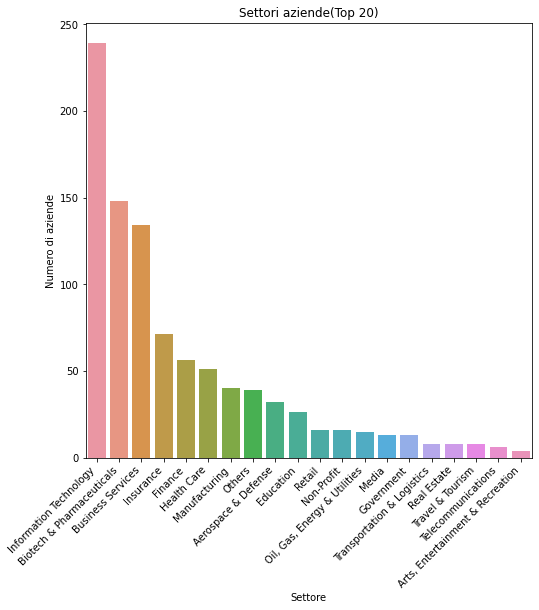

In [37]:
data['Settore'] = data['Settore'].apply(lambda x: 'Others' if x=='-1' else x)

plt.figure(figsize=(8,8))
g = sns.countplot(x='Settore', data=data, order = data['Settore'].value_counts()[:20].index)
p = plt.title('Settori aziende(Top 20)')
p = plt.xlabel('Settore')
p = plt.ylabel('Numero di aziende')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Cleaning column 'Fatturato'**

In [38]:
def pulizia_fatturato(fatturato):
  if '-1' in fatturato.lower():
    return 'Unknown / Non-Applicable'
  else:
    return fatturato

data['Fatturato'] = data['Fatturato'].apply(pulizia_fatturato)

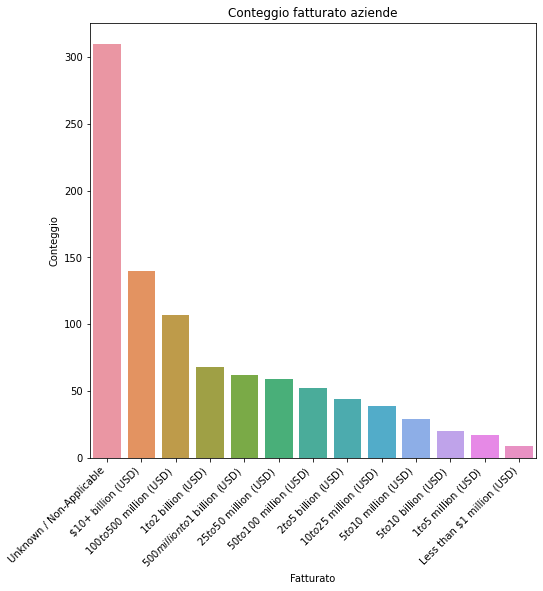

In [39]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Fatturato', data=data, order = data['Fatturato'].value_counts().index)
p = plt.title('Conteggio fatturato aziende')
p = plt.xlabel('Fatturato')
p = plt.ylabel('Conteggio')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Cleaning column 'Concorrenti'**

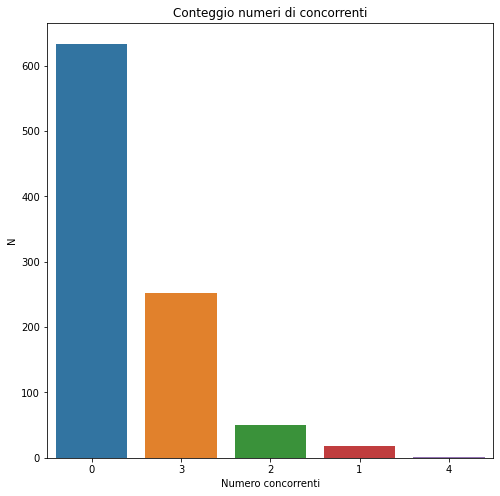

In [40]:
data['Concorrenti'] = data['Concorrenti'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

plt.figure(figsize=(8,8))
g = sns.countplot(x='Concorrenti', data=data, order = data['Concorrenti'].value_counts().index)
p = plt.title('Conteggio numeri di concorrenti')
p = plt.xlabel("Numero concorrenti")
p = plt.ylabel('N')

***ACTUAL DATASET***

In [41]:
data.tail()

,Titolo lavorativo,Salario stimato,Descrizione lavoro,Punteggio,Compagnia,Luogo,Sede,Dimensioni,Anno fondazione,Tipo di azienda,Industria,Settore,Fatturato,Concorrenti
Numero osservazione,,,,,,,,,,,,,,
951,data engineer,102.5,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,TN,"San Francisco, CA",1001 to 5000 employees,2006,Public,Internet,Information Technology,$100 to $500 million (USD),3
952,data scientist,73.5,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,PA,"Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0
953,manager,127.5,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC",PA,"Chadds Ford, PA",1 to 50 employees,1996,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0
954,data engineer,97.5,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW,TX,"Portland, OR",201 to 500 employees,2015,Private,IT Services,Information Technology,$25 to $50 million (USD),1
955,data scientist,93.5,Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,OH,"Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),0


**We use the .to_csv and .download function to convert and download our clean dataset.**

In [42]:
from google.colab import files
data.to_csv('data_clean.csv') 
files.download('data_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dataset analysis

**We look for and then plot any correlation between the numerical data.**

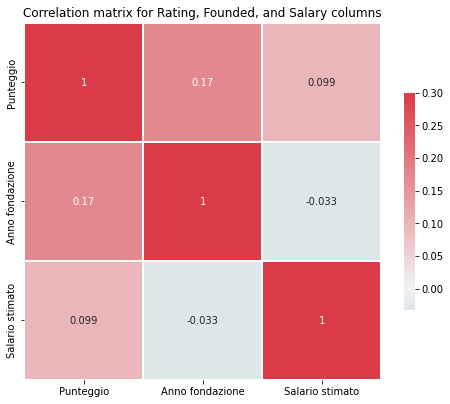

In [43]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) #diverging_palette creates a divergent palette.
plt.figure(figsize=(8,8))
corr = data[['Punteggio','Anno fondazione','Salario stimato']].corr() #Correlation calculation between the 3 values.

g = sns.heatmap(corr, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5}) #I create via heatmap a color gradient that varies according to the correlation value.
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

**We note how the values of salary are not correlated at all with the company's founding year.
The correlation between score and minimum wage is also low while score and founding year are correlated.**

**Let us now create extra tables to learn about known programming languages.**

**If there is one of the following languages in the job description then we assign the value 1 to the corresponding table.**

In [44]:
data['python_job'] = data['Descrizione lavoro'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data['excel_job'] = data['Descrizione lavoro'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
data['sql_job'] = data['Descrizione lavoro'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
data['tableau_job'] = data['Descrizione lavoro'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

**We plot multiple graphs to know just how many people know a particular language.**

In [45]:
'''
#Per python
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=data)
p = plt.title('Conteggio numero di persone che conoscono Python')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')
#Per sql
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=data)
p = plt.title('Conteggio numero di persone che conoscono Sql')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')
#Per tableau
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=data)
p = plt.title('Conteggio numero di persone che conoscono Tableau')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')
#Per excel
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=data)
p = plt.title('Conteggio numero di persone che conoscono Excel')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')
'''

'\n#Per python\nplt.figure(figsize=(5,5))\ng = sns.countplot(x=\'python_job\', data=data)\np = plt.title(\'Conteggio numero di persone che conoscono Python\')\np = plt.xlabel("1(Si) 0(No)")\np = plt.ylabel(\'N\')\n#Per sql\nplt.figure(figsize=(5,5))\ng = sns.countplot(x=\'sql_job\', data=data)\np = plt.title(\'Conteggio numero di persone che conoscono Sql\')\np = plt.xlabel("1(Si) 0(No)")\np = plt.ylabel(\'N\')\n#Per tableau\nplt.figure(figsize=(5,5))\ng = sns.countplot(x=\'tableau_job\', data=data)\np = plt.title(\'Conteggio numero di persone che conoscono Tableau\')\np = plt.xlabel("1(Si) 0(No)")\np = plt.ylabel(\'N\')\n#Per excel\nplt.figure(figsize=(5,5))\ng = sns.countplot(x=\'excel_job\', data=data)\np = plt.title(\'Conteggio numero di persone che conoscono Excel\')\np = plt.xlabel("1(Si) 0(No)")\np = plt.ylabel(\'N\')\n'

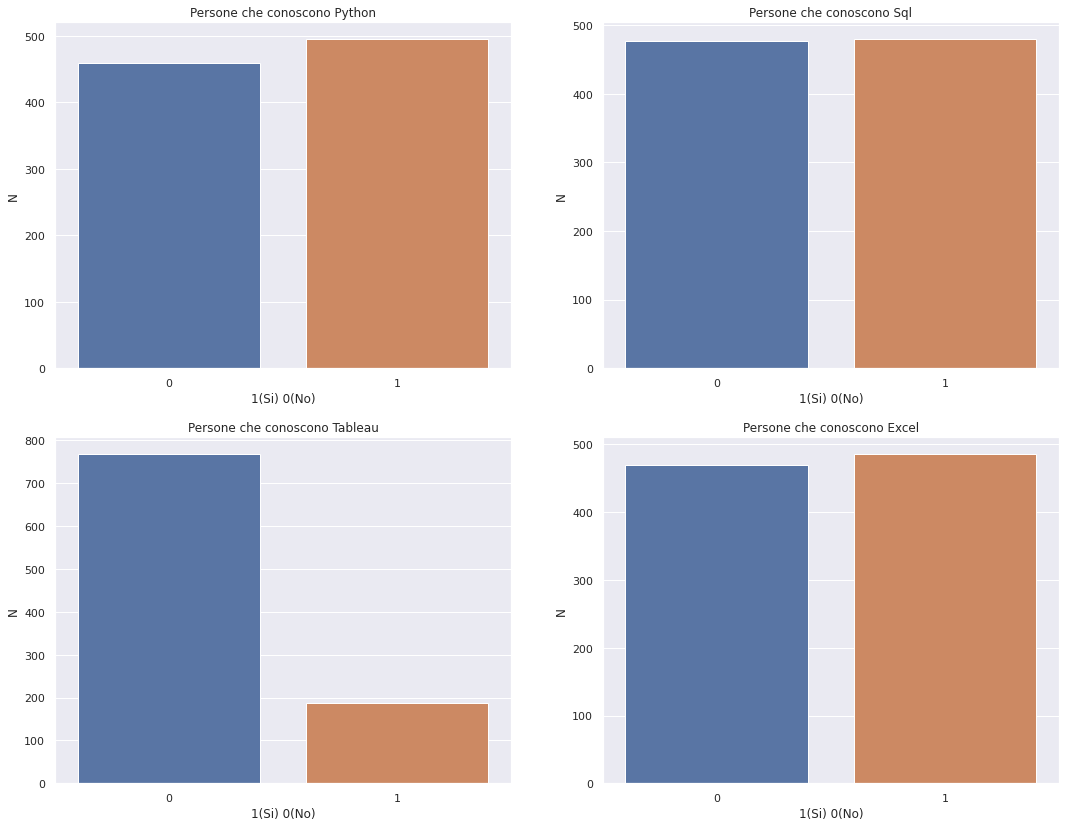

In [46]:
sns.set(rc={"figure.figsize": (18, 14)}) #I create a large table and then insert sub-tables into it

subplot(2,2,1)
g = sns.countplot(x='python_job', data=data)
p = plt.title('Persone che conoscono Python')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')

subplot(2,2,2)
g = sns.countplot(x='sql_job', data=data)
p = plt.title('Persone che conoscono Sql')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')

subplot(2,2,3)
g = sns.countplot(x='tableau_job', data=data)
p = plt.title('Persone che conoscono Tableau')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')

subplot(2,2,4)
g = sns.countplot(x='excel_job', data=data)
p = plt.title('Persone che conoscono Excel')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')

plt.show()

**As we can see from the graphs the most popular languages are python, sql and excel. While tableau is not a very well known tool.**

**After extracting the information from the job description, we can also delete the column.**

In [47]:
data.drop(labels=['Descrizione lavoro'], axis = 1, inplace=True)

**Since it is a dataset with columns with more than 10 or 20 values we decide to reduce the dimensionality by taking the most frequent values.**

In [48]:
settore = list(data['Settore'].value_counts()[:10].index)

def settore_rid(text):
  if text not in settore:
    return 'Others'
  else:
    return text

data['Settore'] = data['Settore'].apply(settore_rid)

In [49]:
luogo_lavoro = list(data['Luogo'].value_counts()[:9].index)

def luogo_lavoro_rid(text):
  if text not in luogo_lavoro:
    return 'Others'
  else:
    return text

data['Luogo'] = data['Luogo'].apply(luogo_lavoro_rid)

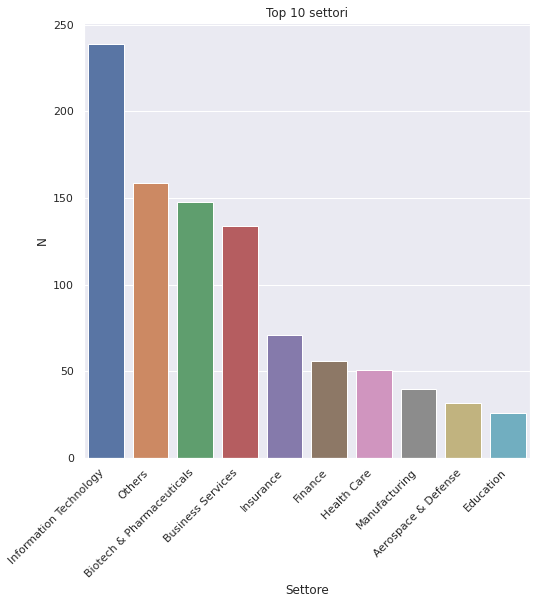

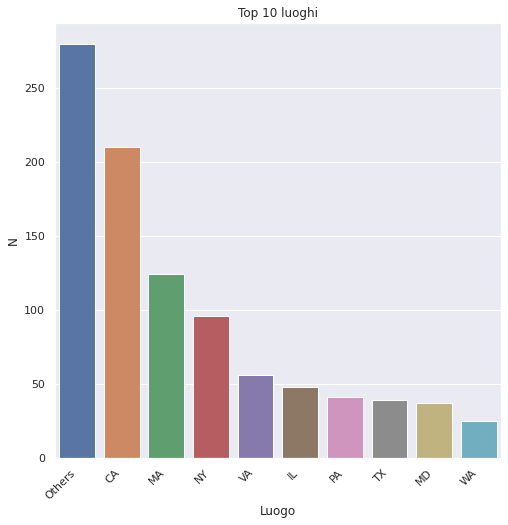

In [50]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Settore', data=data, order = data['Settore'].value_counts().index)
p = plt.title('Top 10 settori')
p = plt.xlabel('Settore')
p = plt.ylabel('N')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.figure(figsize=(8,8))
g = sns.countplot(x='Luogo', data=data, order = data['Luogo'].value_counts().index)
p = plt.title('Top 10 luoghi')
p = plt.xlabel('Luogo')
p = plt.ylabel('N')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**We eliminate other columns that are no longer needed.**

In [51]:
data.drop(labels=['Compagnia', 'Sede', 'Industria'], axis=1, inplace=True)

In [52]:
data.columns

Index(['Titolo lavorativo', 'Salario stimato', 'Punteggio', 'Luogo',
       'Dimensioni', 'Anno fondazione', 'Tipo di azienda', 'Settore',
       'Fatturato', 'Concorrenti', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

**We now assign a numerical value for variables such as 'Dimensioni' and 'Fatturato'.**

In [53]:
dim = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

data['Dimensioni'] = data['Dimensioni'].map(dim)

revenue_dim = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
           '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

data['Fatturato'] = data['Fatturato'].map(revenue_dim)

data.head()

,Titolo lavorativo,Salario stimato,Punteggio,Luogo,Dimensioni,Anno fondazione,Tipo di azienda,Settore,Fatturato,Concorrenti,python_job,excel_job,sql_job,tableau_job
Numero osservazione,,,,,,,,,,,,,,
0,data scientist,72.0,3.8,Others,4,1973,Private,Aerospace & Defense,6,0,1,1,0,1
1,data scientist,87.5,3.4,MD,7,1984,Other Organization,Health Care,10,0,1,0,0,0
2,data scientist,85.0,4.8,Others,4,2010,Private,Business Services,7,0,1,1,1,0
3,data scientist,76.5,3.8,WA,5,1965,Government,Others,8,3,1,0,0,0
4,data scientist,114.5,2.9,NY,2,1998,Private,Business Services,0,3,1,1,1,0


**We now use the *get_dummies* function to convert qualitative variables to quantitative variables.**

In [54]:
#We split the variable 'Tipo di azienda'.
print('Prima: {}'.format(data.shape))
data = pd.get_dummies(columns=['Tipo di azienda'],data=data,prefix='Tipo di azienda')
print('Dopo: {}'.format(data.shape))

#We split the variable 'Settore'.
print('Prima: {}'.format(data.shape))
data = pd.get_dummies(columns=['Settore'], data=data)
print('Dopo: {}'.format(data.shape))

#We split the variable 'Titolo lavorativo'.
print('Prima: {}'.format(data.shape))
data = pd.get_dummies(columns=['Titolo lavorativo'], data=data)
print('Dopo: {}'.format(data.shape))

Prima: (956, 14)
Dopo: (956, 21)
Prima: (956, 21)
Dopo: (956, 30)
Prima: (956, 30)
Dopo: (956, 36)


**Now having a high dimensionality of the dataset we eliminate variable *others.***

In [55]:
data.drop(labels=['Tipo di azienda_Other Organization','Settore_Others','Titolo lavorativo_other'], axis=1, inplace=True)
data.drop(labels=['Luogo'], axis=1, inplace=True)

**We select the columns with more mutual information using the *mutual_info_regression* and *SelectKBest* functions.**

In [56]:
X = data.drop('Salario stimato', axis=1)
y = data['Salario stimato']

**After creating two different 'data frames' we relate all columns to 'Estimated Wage'. We plot the result and the values found we place them in the graph below.**

In [57]:
fs = SelectKBest(score_func=mutual_info_regression, k='all') 
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7efe065e4a60>)

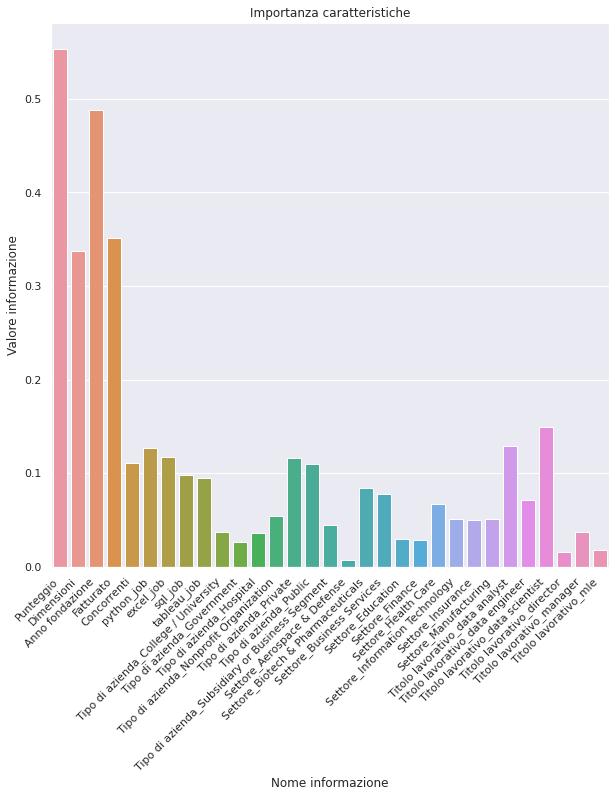

In [58]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Importanza caratteristiche')
p = plt.xlabel('Nome informazione')
p = plt.ylabel('Valore informazione')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Obviously there are n pieces of information that impact the target information the most. We plot the top 20** in order.

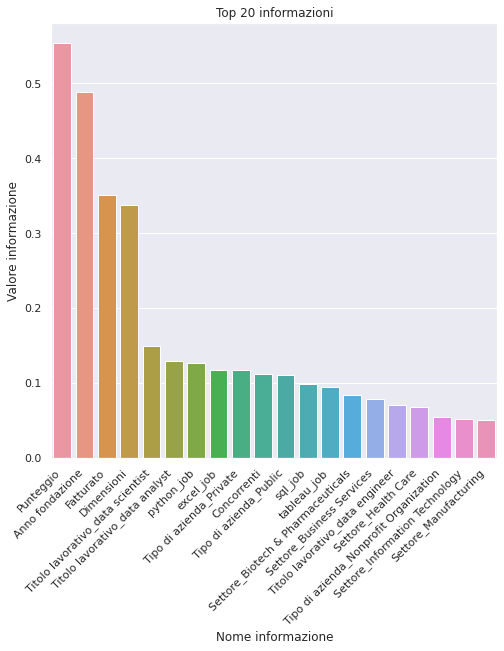

In [59]:
info_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_info = info_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_info.index, y=top20_info['Score'])
p = plt.title('Top 20 informazioni')
p = plt.xlabel('Nome informazione')
p = plt.ylabel('Valore informazione')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**We plot the correlation matrix among the 20 pieces of information found.**

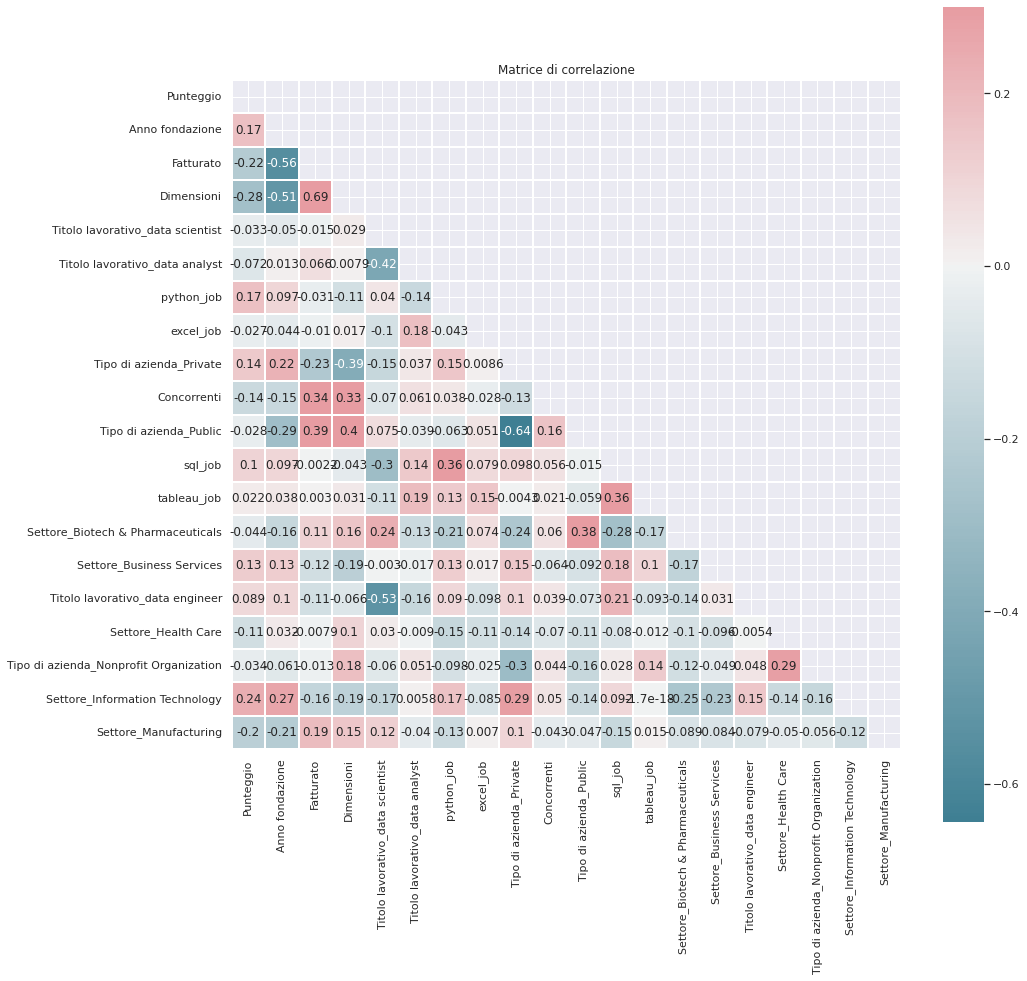

In [60]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_info.index].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Matrice di correlazione')

**There are many analyses that can be done with this correlation matrix. Among the main ones we find little correlation between:**

*   Tipo di azienda_Public e Tipo di azienda_Private
*   Titolo lavorativo_data engineer e Titolo lavorativo_data scientist
*   Anno di fondazione con Fatturato e Dimensioni

**While we find a strong correlation in:**
*   Sql
*   Fatturato
*   Settore_Information Technology




In [61]:
X = X[top20_info.index]
X.drop(labels=['Tipo di azienda_Public', 'Titolo lavorativo_data engineer','Anno fondazione'], axis=1, inplace=True)

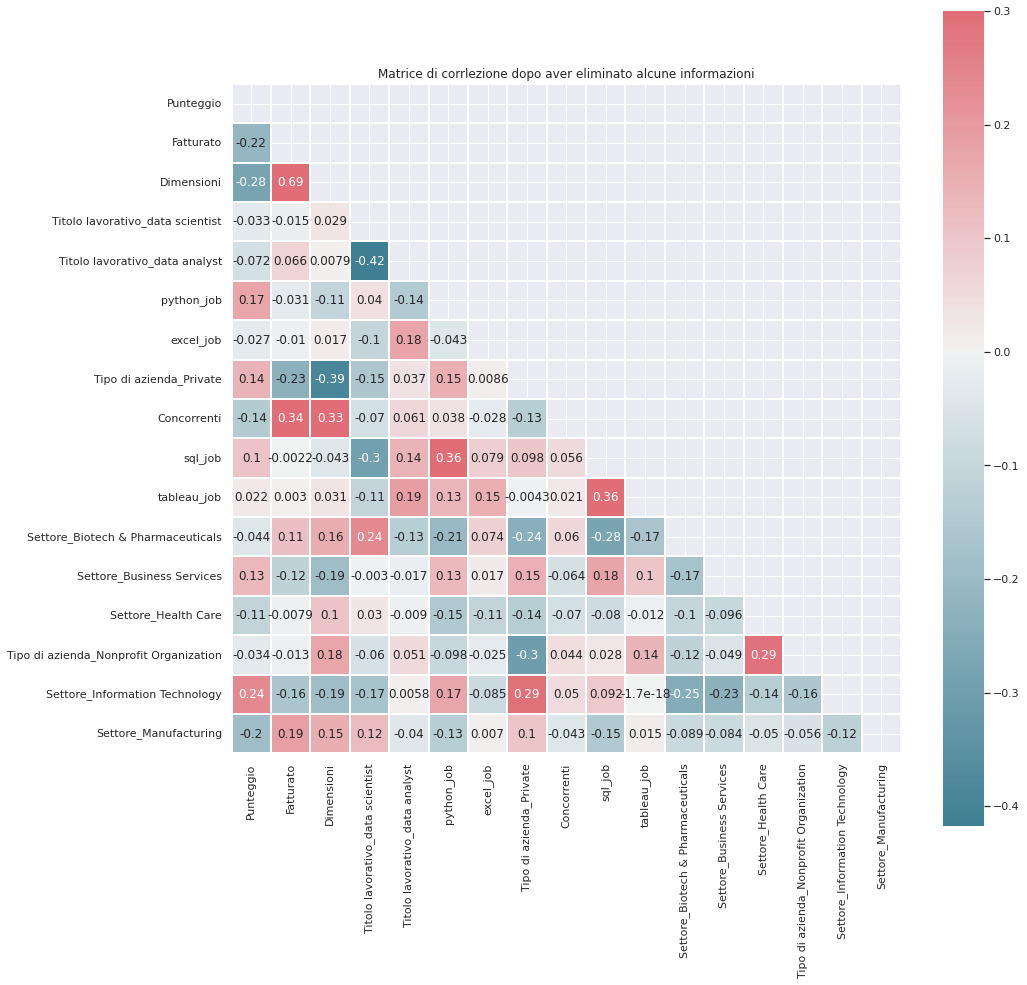

In [62]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Matrice di corrlezione dopo aver eliminato alcune informazioni')

In [63]:
X.columns


Index(['Punteggio', 'Fatturato', 'Dimensioni',
       'Titolo lavorativo_data scientist', 'Titolo lavorativo_data analyst',
       'python_job', 'excel_job', 'Tipo di azienda_Private', 'Concorrenti',
       'sql_job', 'tableau_job', 'Settore_Biotech & Pharmaceuticals',
       'Settore_Business Services', 'Settore_Health Care',
       'Tipo di azienda_Nonprofit Organization',
       'Settore_Information Technology', 'Settore_Manufacturing'],
      dtype='object')

In [64]:
'''X = X[['Punteggio', 'Fatturato', 'Dimensioni',
       'Titolo lavorativo_data scientist', 'python_job',
       'Titolo lavorativo_data analyst', 'excel_job', 'Concorrenti',
       'Tipo di azienda_Private', 'tableau_job',
       'Settore_Biotech & Pharmaceuticals', 'sql_job',
       'Tipo di azienda_Nonprofit Organization', 'Settore_Health Care',
       'Settore_Business Services', 'Settore_Information Technology',
       'Settore_Manufacturing']]'''

"X = X[['Punteggio', 'Fatturato', 'Dimensioni',\n       'Titolo lavorativo_data scientist', 'python_job',\n       'Titolo lavorativo_data analyst', 'excel_job', 'Concorrenti',\n       'Tipo di azienda_Private', 'tableau_job',\n       'Settore_Biotech & Pharmaceuticals', 'sql_job',\n       'Tipo di azienda_Nonprofit Organization', 'Settore_Health Care',\n       'Settore_Business Services', 'Settore_Information Technology',\n       'Settore_Manufacturing']]"

**We use the *StandardScaler* library to scale our values**.

In [65]:
X.head()

,Punteggio,Fatturato,Dimensioni,Titolo lavorativo_data scientist,Titolo lavorativo_data analyst,python_job,excel_job,Tipo di azienda_Private,Concorrenti,sql_job,tableau_job,Settore_Biotech & Pharmaceuticals,Settore_Business Services,Settore_Health Care,Tipo di azienda_Nonprofit Organization,Settore_Information Technology,Settore_Manufacturing
Numero osservazione,,,,,,,,,,,,,,,,,
0,3.8,6,4,1,0,1,1,1,0,0,1,0,0,0,0,0,0
1,3.4,10,7,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,4.8,7,4,1,0,1,1,1,0,1,0,0,1,0,0,0,0
3,3.8,8,5,1,0,1,0,0,3,0,0,0,0,0,0,0,0
4,2.9,0,2,1,0,1,1,1,3,1,0,0,1,0,0,0,0


In [66]:
X_prev = X.copy()

sc_punteggio = StandardScaler()
X['Punteggio'] = sc_punteggio.fit_transform(X[['Punteggio']])

sc_fatturato = StandardScaler()
X['Fatturato'] = sc_fatturato.fit_transform(X[['Fatturato']])

X.head()

,Punteggio,Fatturato,Dimensioni,Titolo lavorativo_data scientist,Titolo lavorativo_data analyst,python_job,excel_job,Tipo di azienda_Private,Concorrenti,sql_job,tableau_job,Settore_Biotech & Pharmaceuticals,Settore_Business Services,Settore_Health Care,Tipo di azienda_Nonprofit Organization,Settore_Information Technology,Settore_Manufacturing
Numero osservazione,,,,,,,,,,,,,,,,,
0,0.048588,0.151945,4,1,0,1,1,1,0,0,1,0,0,0,0,0,0
1,-0.620043,1.051385,7,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1.720165,0.376805,4,1,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0.048588,0.601665,5,1,0,1,0,0,3,0,0,0,0,0,0,0,0
4,-1.455831,-1.197215,2,1,0,1,1,1,3,1,0,0,1,0,0,0,0


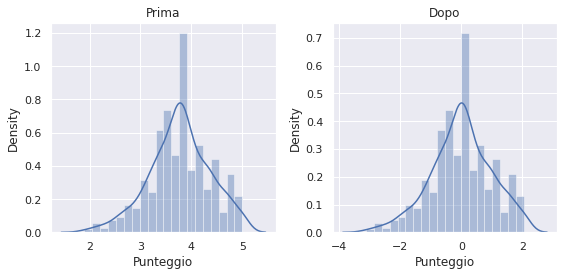

In [67]:
plt.figure(figsize=(8, 4))

#First plot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['Punteggio'])
p = plt.title('Prima')

#Second plot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['Punteggio'])
p = plt.title('Dopo')

plt.tight_layout()
plt.show()

**Scaling a dataset does not change the distribution.**

#Model construction and evaluation

**The metric for evaluating the best model is Negative Root Mean Squared Error (NRMSE). 
So the best model is the one that minimizes it.**

In [73]:
linear_regression = LinearRegression()
cv = cross_val_score(linear_regression, X, y, cv = 10, scoring ='neg_root_mean_squared_error') #We use the cross validation function with k=10.
print('--NRMSE media: {} ---'.format(round(cv.mean(),3))) #format replaces the value it holds inside the curly brackets.
print('Deviazione standard: {}'.format(round(cv.std(),3))) #round round one digit with n decimal numbers, 3 in our case.

--NRMSE media: -29.029 ---
Deviazione standard: 1.619


In [74]:
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv = 10, scoring ='neg_root_mean_squared_error')
print('--NRMSE media: {} ---'.format(round(cv.mean(),3)))
print('Deviazione standard: {}'.format(round(cv.std(),3)))

--NRMSE media: -29.7 ---
Deviazione standard: 1.487


In [75]:
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv = 10, scoring ='neg_root_mean_squared_error')
print('--NRMSE media: {} ---'.format(round(cv.mean(),3)))
print('Deviazione standard: {}'.format(round(cv.std(),3)))

--NRMSE media: -19.904 ---
Deviazione standard: 5.437


In [76]:
gbr = GradientBoostingRegressor()
cv = cross_val_score(gbr, X, y, cv = 10, scoring ='neg_root_mean_squared_error')
print('--NRMSE media: {} ---'.format(round(cv.mean(),3)))
print('Deviazione standard: {}'.format(round(cv.std(),3)))

--NRMSE media: -26.55 ---
Deviazione standard: 1.852


In [77]:
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gbr)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv = 10, scoring ='neg_root_mean_squared_error')
print('--NRMSE media: {} ---'.format(round(cv.mean(),3)))
print('Deviazione standard: {}'.format(round(cv.std(),3)))

--NRMSE media: -21.2 ---
Deviazione standard: 4.15


**Of the various models, we choose the random forest with an NRMSE = -19.872, which is closest to zero.**

# Prediction

**We now create a function that tries to predict the salary of a professional figure such as a data scientist. After entering the characteristics of the data scientist, our random forest will try to give us an estimate.**

In [ ]:
rf = RandomForestRegressor()
X.drop(labels=['Dimensioni', 'Fatturato','Tipo di azienda_Nonprofit Organization','Settore_Manufacturing','Tipo di azienda_Private'], axis=1, inplace=True)
X.columns

Index(['Punteggio', 'Titolo lavorativo_data scientist',
       'Titolo lavorativo_data analyst', 'Concorrenti', 'excel_job',
       'tableau_job', 'python_job', 'Settore_Biotech & Pharmaceuticals',
       'sql_job', 'Settore_Information Technology',
       'Settore_Business Services', 'Settore_Insurance'],
      dtype='object')

In [ ]:
rf.fit(X, y)

RandomForestRegressor()

In [ ]:
def predizione_salario(score, competitor, sector, ownership, titolo_lavorativo, job_skills):

    prediction_input = list()

    prediction_input.append(sc_punteggio.transform(np.array(score).reshape(1,-1)))
    prediction_input.append(competitor)

    sector_columns = ['Settore_Biotech & Pharmaceuticals','Settore_Information Technology'
                      'Settore_Business Services','Settore_Health Care']

    temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
    for index in range(0, len(sector_columns)):
      if sector_columns[index] == 'Settore_' + sector:
        temp[index] = 1
        break
    prediction_input = prediction_input + temp


    if ownership == ['Tipo di azienda_Private']:
      prediction_input.append(1)
    else:
      prediction_input.append(0)


    job_title_columns = ['Titolo lavorativo_data scientist', 'Titolo lavorativo_data analyst']
    temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
    for index in range(0, len(job_title_columns)):
        if job_title_columns[index] == 'Titolo lavorativo_' + titolo_lavorativo:
          temp[index] = 1
          break
    prediction_input = prediction_input + temp


    temp = list(map(int, np.zeros(shape=(1, 4))[0]))
    if 'excel' in job_skills:
      temp[0] = 1
    if 'python' in job_skills:
      temp[1] = 1
    if 'tableau' in job_skills:
      temp[2] = 1
    if 'sql' in job_skills:
      temp[3] = 1
    prediction_input = prediction_input + temp

    return rf.predict([prediction_input])[0]


**Let's try to make some predictions now.**

**First case.**

In [ ]:
salario1 = predizione_salario(4.5,2,'Settore_Information Technology','Private','data scientist',['python','excel','tableau','sql'])

In [ ]:
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salario1*1000)-9000, int(salario1*1000)+9000))

Estimated salary (range): 102470(USD) to 120470(USD) per annum.


**Second case.**

In [ ]:
salario2 = predizione_salario(3.5,4,'Settore_Business Services','Private','data analyst',['python','sql'])

In [ ]:
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salario2*1000)-9000, int(salario2*1000)+9000))

Estimated salary (range): 96848(USD) to 114848(USD) per annum.


#Conclusions

**Our algorithm was able to give us a salary estimate for two professional figures as a data analyst and scientist.**

**We came to predict the outcome after several steps, one equally important to the other.**


**In the *Data Cleaning* phase we did more in-depth analysis on the data at hand where the main work was to find outliers such as -1 and replace it with a numerical figure (most of the time this was done by replacing them with the mean or median) while for qualitative data we chose to categorize the outliers with *Others*.
During the cleaning also plotted some graphs to understand the trend of the data such as understanding which values are more frequent than others.**


**In the *Dataset analysis* phase, a lot of use was made of the correlation function to figure out which variables were more statistically related to the others and which were perhaps less so. In this part we chose to use correlation as support for assumptions made earlier, of course other metrics can be used which is also the correct choice to make in order to get as much feedback as possible.
In addition, the column *Job Description* was used to extrapolate the hard skills possessed by employees such as SQL and python.**


**In the *Model Construction and Evaluation* phase we chose NRMSE as the error metric, we recommend trying to use others such as MAE(Mean Absolute Error) and RMSE(Root Mean Squared Error). 
Choosing NRMSE as the evaluation, we found that *Random Forset* was the ML model that minimized it compared to the others.**


**In the *Prediction* phase finally, all we did was to use the function constructed in the previous section to try to predict the results, which are as follows:**

**CASE 1**:

* Punteggio azienda = 4.5
* Competitori aziendali = 2
* Settore azienda = Information Technology
* Tipo di azienda = Privata
* Titolo lavorativo = Data scientist
* Hard skills possedute = Python, Excel, Tableau, Sql

***Estimated salary: 102470(USD) to 120470(USD) per annum.***

**CASE 2**:

* Punteggio azienda = 3.5
* Competitori aziendali = 4
* Settore azienda = Business Services
* Tipo di azienda = Privata
* Titolo lavorativo = Data analyst
* Hard skills possedute = Python, Sql

***Estimated salary: 96848(USD) to 114848(USD) per annum.***



